In [2]:
import pandas as pd
df = pd.read_csv('fruits.csv')
df

,Colour,Texture,Weight,Diameter,Fruit
0,red,0.20,156,7.50,apple
1,orange,0.80,98,4.00,clementine
2,green,0.85,235,8.20,apple
3,yellow,0.04,105,1.20,banana
4,orange,0.90,105,5.20,clementine
5,orange,0.60,125,6.40,clementine
6,green,0.15,165,9.10,apple
7,red,0.00,187,11.10,apple
8,yellow,0.07,120,2.10,banana
9,orange,1.00,103,5.70,clementine


In [3]:
#Identify unique values for colours and fruit
print("Colours : \t", df.Colour.unique())
print("Fruit : \t", df.Fruit.unique())

Colours : 	 ['red' 'orange' 'green' 'yellow']
Fruit : 	 ['apple' 'clementine' 'banana']


In [ ]:
#Plot a bar chart to show number of occurences to see if the data is balance.
X = df.iloc[:, :-1]
y = df['Fruit']
y.value_counts().sort_values().plot.bar(x='Target Value', y='Number of Occurrences')

<AxesSubplot:xlabel='Weight', ylabel='Texture'>

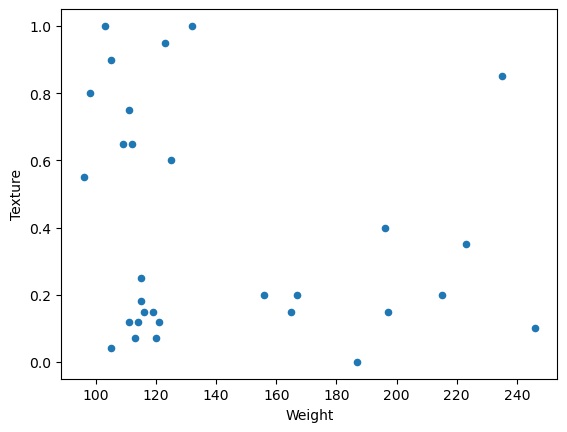

In [4]:
#Scatter plot
df.plot(x='Weight', y='Texture', kind='scatter')

<AxesSubplot:xlabel='Weight', ylabel='Texture'>

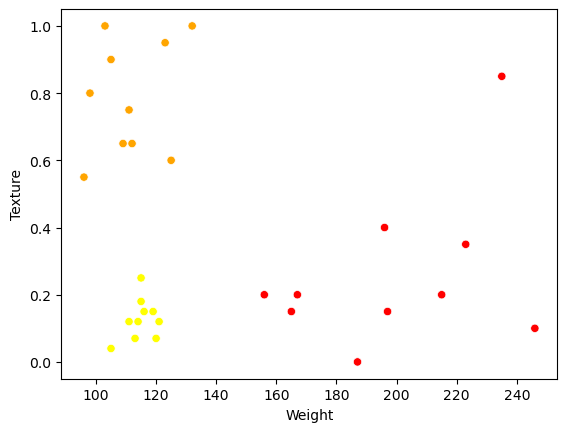

In [5]:
#Create a seaborn scatter plot for samples from each class - Weight and Texture
import seaborn as sns
sns.scatterplot(x="Weight", y="Texture", hue='Fruit', palette=['red', 'orange', 'yellow'], data=df, legend=False)

<AxesSubplot:xlabel='Weight', ylabel='Diameter'>

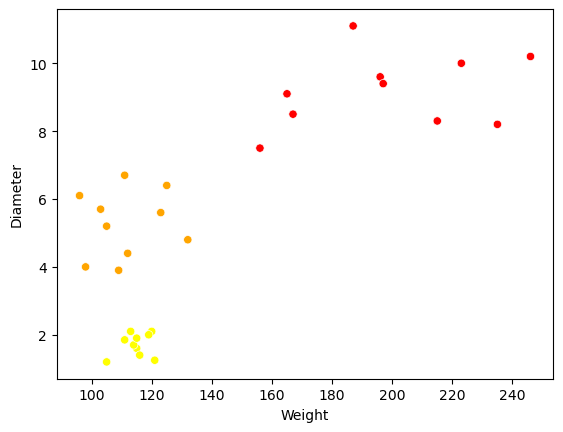

In [6]:
#Create a seaborn scatter plot for samples from each class - Weight and Diameter
import seaborn as sns
sns.scatterplot(x="Weight", y="Diameter", hue='Fruit', palette=['red', 'orange', 'yellow'], data=df, legend=False)

In [7]:
#Convert string to numbers to use for classification
df['Colour'].replace(['red', 'orange', 'green', 'yellow'], [0, 1, 2, 3], inplace=True)
df['Fruit'].replace(['apple', 'clementine', 'banana'], [0, 1, 2], inplace=True)
print(df)

    Colour  Texture  Weight  Diameter  Fruit
0        0     0.20     156      7.50      0
1        1     0.80      98      4.00      1
2        2     0.85     235      8.20      0
3        3     0.04     105      1.20      2
4        1     0.90     105      5.20      1
5        1     0.60     125      6.40      1
6        2     0.15     165      9.10      0
7        0     0.00     187     11.10      0
8        3     0.07     120      2.10      2
9        1     1.00     103      5.70      1
10       0     0.40     196      9.60      0
11       3     0.25     115      1.60      2
12       1     0.65     112      4.40      1
13       1     0.55      96      6.10      1
14       0     0.20     215      8.30      0
15       3     0.15     116      1.40      2
16       0     0.35     223     10.00      0
17       3     0.12     114      1.70      2
18       2     0.10     246     10.20      0
19       3     0.12     121      1.25      2
20       3     0.15     119      2.00      2
21       1

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

#Number of neighbors
n_neighbors = 3

feature_cols = ['Colour', 'Texture', 'Weight', 'Diameter']
X = df[feature_cols]
y = df.Fruit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


#Create an instance of the KNN Classifier and fit the data.
clffruit = neighbors.KNeighborsClassifier(n_neighbors)
clffruit.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Predicting fruit based on Weight and Diameter
predicted = clffruit.predict(X_test)
print(X_test)
print(y_test)
print(predicted)

#To predict using different vlaues
#predicted= clffruit.predict([[180,8]])


In [ ]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predicted)
print(accuracy*100)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

#Prepare data and split into test/train data
feature_cols = ['Colour', 'Texture', 'Weight', 'Diameter']
X = df[feature_cols]
y = df.Fruit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


#Create an instance of the Decision Tress Classifier and fit the data.
clffruit = tree.DecisionTreeClassifier()
clffruit.fit(X_train, y_train)

In [ ]:
#Plot the decision tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clffruit, fontsize=10)
plt.show()

In [ ]:
#Predicting fruit using test data
predicted = clffruit.predict(X_test)
print(X_test)
print(y_test)
print(predicted)

In [ ]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predicted)
print(accuracy*100)